In [1]:
# Import the necessary libraries or install them if they are not installed related to training the model.
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

C:\Users\Firesoft\AppData\Local\Temp\ipykernel_7376\1889335367.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the data from the csv file
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.read_csv("bank.csv", header=None, names=col_names, skiprows=[0])

In [3]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
# Convert the categorical data into numerical data
catergorical_columns = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.get_dummies(bank, columns=catergorical_columns, drop_first=True, prefix=None)
# Convert the non-binary categorical data into numerical data
label_encoder = LabelEncoder()
bank["region"] = label_encoder.fit_transform(bank["region"])

In [5]:
bank.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,False,False,False,False,False,False,True
1,ID12102,40,3,30085.1,3,True,True,True,False,True,True,False
2,ID12103,51,0,16575.4,0,False,True,True,True,True,False,False
3,ID12104,23,3,20375.4,3,False,True,False,False,True,False,False
4,ID12105,57,1,50576.3,0,False,True,False,True,False,False,False


In [6]:
# Spilitting the data, the features columns refers to the independent variables and the label column refers to the dependent variable
# The label column is the column that we are trying to predict
feature_cols = ["age", "sex_MALE", "income", "married_YES", "children", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = bank[feature_cols] # Features
y = bank.pep_YES # Target variable

In [7]:
# Splitting the data into training and testing sets
# 70% training and 30% testing are the common ratios (80/20 is also common)
# The random_state is used to ensure that the data is split in the same way every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Create Gaussian Naive Bayes classifer object
gauss_nb = GaussianNB()

# Fit the data into the model
gauss_nb = gauss_nb.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = gauss_nb.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.6388888888888888
Precision: 0.6119402985074627


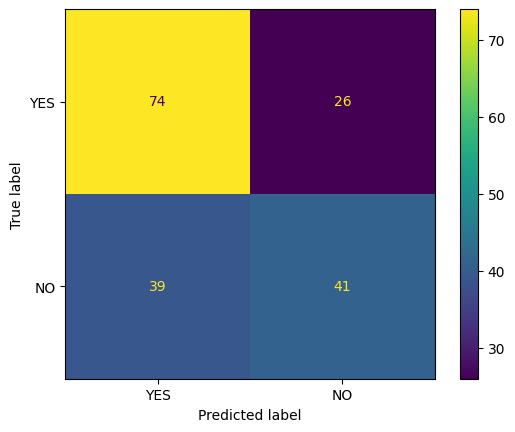

In [10]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

# Notes
### Naive Bayes Pros
- It is not only a simple approach but also a fast and accurate method for prediction.
Naive Bayes has a very low computation cost.
- It can efficiently work on a large dataset.
- It performs well in case of discrete response variable compared to the continuous variable.
- It can be used with multiple class prediction problems.
- It also performs well in the case of text analytics problems.
When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.
### Naive Bayes Cons
- The assumption of independent features. In practice, it is almost - impossible that model will get a set of predictors which are entirely independent.
- If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.
- Also, it lacks some hyperparameter tuning.

Source: datacamp.com

### What I have learned
- This model performed almost the last place (The last being logistic regression) which was expected since most data are categorical and sometimes probabilities are not the most suited to perform the task for this classification.
- Although as stated in Pros section, it still performs slighly better than the logistic regression model.
- Also, this model performs close to logistic regression because they are both linear relationship based which our dataset was not linearly related.